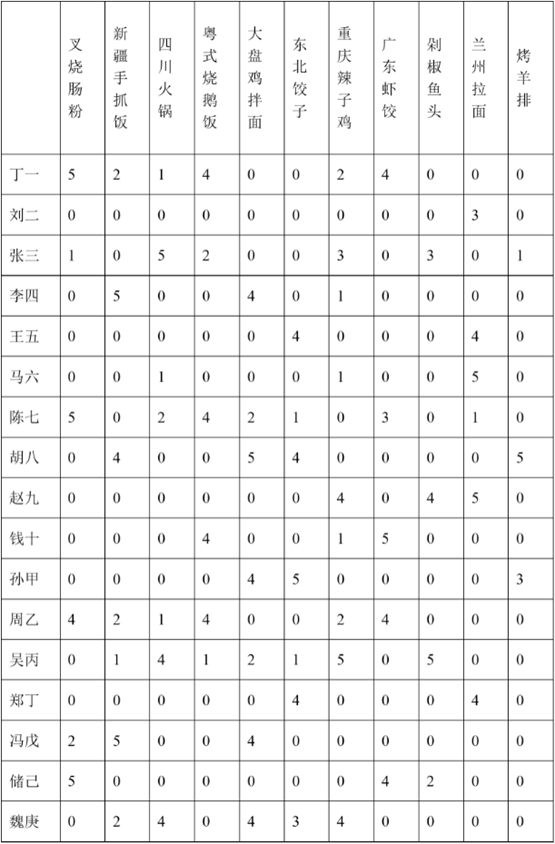

In [21]:
import numpy as np
#把用户给菜品的打分用矩阵的形式表示出来
scoreData = np.array([
[5,2,1,4,0,0,2,4,0,0,0],
[0,0,0,0,0,0,0,0,0,3,0],
[1,0,5,2,0,0,3,0,3,0,1],
[0,5,0,0,4,0,1,0,0,0,0],
[0,0,0,0,0,4,0,0,0,4,0],
[0,0,1,0,0,0,1,0,0,5,0],
[5,0,2,4,2,1,0,3,0,1,0],
[0,4,0,0,5,4,0,0,0,0,5],
[0,0,0,0,0,0,4,0,4,5,0],
[0,0,0,4,0,0,1,5,0,0,0],
[0,0,0,0,4,5,0,0,0,0,3],
[4,2,1,4,0,0,2,4,0,0,0],
[0,1,4,1,2,1,5,0,5,0,0],
[0,0,0,0,0,4,0,0,0,4,0],
[2,5,0,0,4,0,0,0,0,0,0],
[5,0,0,0,0,0,0,4,2,0,0],
[0,2,4,0,4,3,4,0,0,0,0],
[0,3,5,1,0,0,4,1,0,0,0]
])

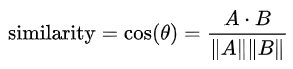

In [22]:
#输出两个向量，输出他们的余弦相速度得分
def cosSim(vec_1, vec_2):
    dotProd = float(np.dot(vec_1.T, vec_2))
    normProd = np.linalg.norm(vec_1)*np.linalg.norm(vec_2)
    return 0.5+0.5*(dotProd/normProd)

In [30]:
#输入原始数据矩阵，压缩后的矩阵，用户的编号和菜品的编号，输出预估评分
def estScore(scoreData,scoreDataRC,userIndex,itemIndex):
    #n表示菜品的数量
    n = np.shape(scoreData)[1]
    simSum = 0
    simSumScore = 0
    for i in range(n):
        #遍历选中的用户对每个菜品的打分
        userScore = scoreData[userIndex,i]
        #如果刚好选中了这个菜品或者用户给这个菜的打分为0，则跳过此次循环周期
        if userScore == 0 or i == itemIndex:
            continue
        #计算压缩后的矩阵两列之间的相似度
        sim = cosSim(scoreDataRC[:, i], scoreDataRC[:, itemIndex])
        #更新分母的值，也就是权值的累加和
        simSum = float(simSum + sim)
        #更新分子的值，也就是累计加权得分值
        simSumScore = simSumScore + userScore * sim
    #如果分母等于0的话，返回零处理异常
    if simSum == 0:
        return 0
    return simSumScore / simSum

In [32]:
#通过svd分解来压缩得分矩阵，加快余弦相似度的计算
U, sigma, VT = np.linalg.svd(scoreData)
sigmaSum = 0
k_num = 0
for k in range(len(sigma)):
    sigmaSum = sigmaSum + sigma[k] * sigma[k]
    if float(sigmaSum)/float(np.sum(sigma ** 2)) > 0.9:
        k_num = k+1
        break
        sigma_K = np.mat(np.eye(k_num)*sigma[:k_num])
scoreDataRC = sigma_K * U.T[:k_num, :] * scoreData

In [19]:
n = np.shape(scoreData)[1]
userIndex = 17

In [29]:
for i in range(n):
    userScore = scoreData[17, i]
    if userScore != 0:
        continue
    print("index:{},score:{}".format(i, estScore(scoreData, scoreDataRC, userIndex, i)))

index:0,score:2.6347116715331165
index:4,score:2.9259893459771127
index:5,score:2.933723884808588
index:8,score:2.9657073178482753
index:9,score:2.9057073432965526
index:10,score:2.926348465526288
